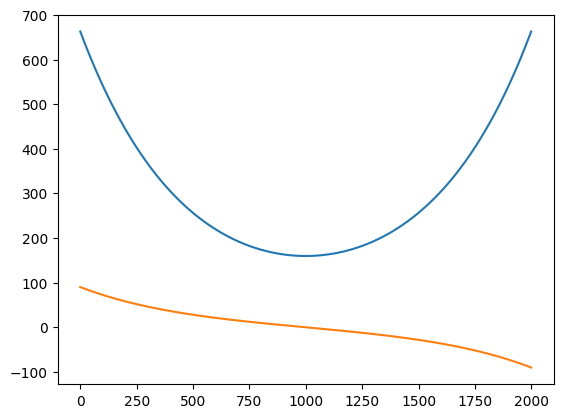

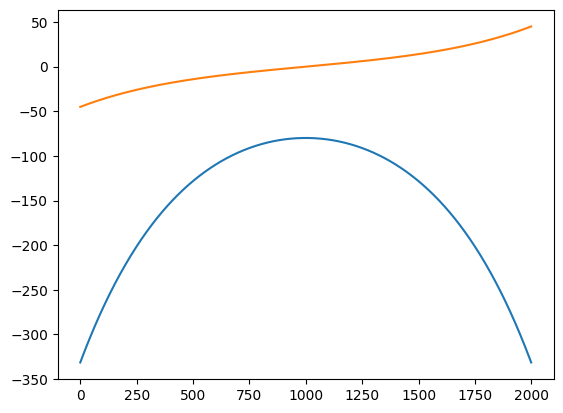

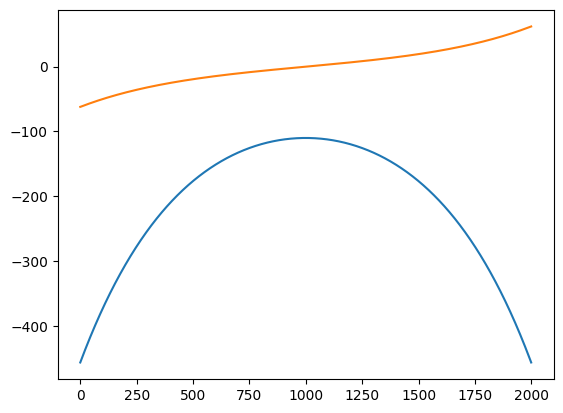

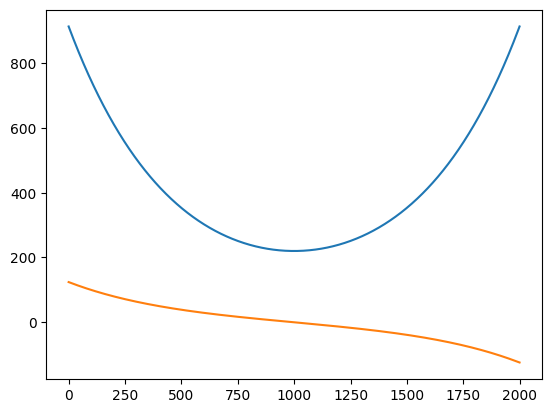

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import yaml
import scipy.constants as const

yamlfile = "input_nowalls.yaml"
with open(yamlfile, 'r') as file:
    config = yaml.safe_load(file)

low = config['particle_types']['C']['low']
high = config['particle_types']['C']['high']
phi = config['particle_types']['C']['phi_0_hi']
d = config['particle_types']['C']['d_hi']
beta = 1 / (config['kB'] * config['T'])
T = config['T']

bin_edges = x_positions = np.linspace(0, config['box_length_x'], 2001)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

species_list = ["C", "O", "N", "X"]

for species in species_list:
    mu = config['particle_types'][species]['mu'] * config['kB'] * config['T']
    xbins = np.array([bin_centers])
    r_low = xbins[0] - low
    r_high = high - xbins[0]
    Vext_values_low = phi * const.Boltzmann * T * np.exp(-r_low/d) * config['particle_types'][species]['q']
    Vext_values_high = phi * const.Boltzmann * T * np.exp(-r_high/d) * config['particle_types'][species]['q']
    Vext_values = Vext_values_low + Vext_values_high
    muloc_profile = (Vext_values - mu) * beta
    muloc_profile_in_kcal_per_mol = muloc_profile * const.Boltzmann * T * const.Avogadro / 4184 # keeping all the beta stuff here beause it helps me visualise conversions
    a = np.append(bin_centers[::]-bin_centers[::][0], bin_centers[::][-1]-bin_centers[::][0]+bin_centers[::][0])
    plt.plot(muloc_profile_in_kcal_per_mol)
    force_profile = np.gradient(-muloc_profile_in_kcal_per_mol, bin_centers) # computes d/dx (-u(x)) for each bin
    plt.plot(force_profile)
    plt.show()
    np.savetxt(f"zbins.txt", a)
    np.savetxt(f"force{species}.txt", force_profile)


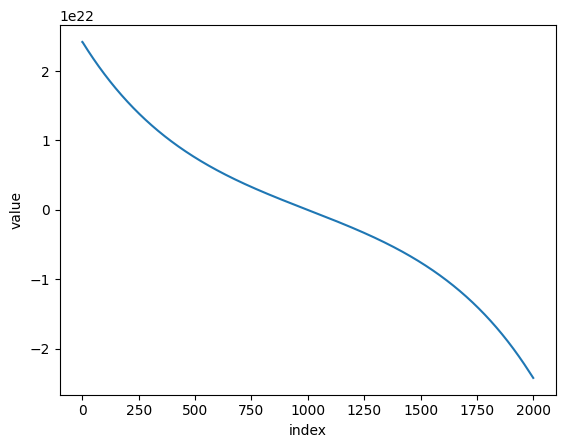

In [20]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt("forceC.txt")

plt.plot(data)
plt.xlabel("index")
plt.ylabel("value")
plt.show()
